In [1]:
from IPython.display import display, HTML
import numpy
import matplotlib
from matplotlib import pyplot
#import seaborn

In [2]:
from tokenise import tokenise

In [3]:
matplotlib.rcParams["figure.figsize"] = (10, 10)

In [4]:
def tsv_lines(text):
    return [line.split("\t") for line in text.splitlines()][1:]

In [5]:
def html_table_row(items):
    output = "<tr>"
    for item in items:
        output += f"<td>{item}</td>"
    output +="</tr>"
    return output

In [6]:
tsvDirectory = "transcripts/improved_tsv"

In [7]:
with open(f"{tsvDirectory}/episodes.tsv", "r", encoding="utf-8") as episodesTsvFile:
    episodesTsv = tsv_lines(episodesTsvFile.read())

speakerTokenCounts = []
speakerTokenCountsLookup = {}

for episode in episodesTsv:
    fileName = episode[2]
    with open(f"{tsvDirectory}/{fileName}", "r", encoding="utf-8") as episodeFile:
        lines = tsv_lines(episodeFile.read())
    
    for line in lines:
        speaker = line[0]
        text = line[1]
        if speaker in speakerTokenCountsLookup:
            speakerTokenCounts[speakerTokenCountsLookup[speaker]]["COUNT"] += len(tokenise(text))
        else:
            speakerTokenCountsLookup[speaker] = len(speakerTokenCounts)
            speakerTokenCounts.append({
                "SPEAKER": speaker,
                "COUNT": len(tokenise(text))
            })

speakerTokenCounts.sort(key=lambda x: -x["COUNT"])

In [8]:
output = "<b>Top fifteen</b><br /><table><tr><th>Speaker</th><th>Count</th></tr>"
for i in range(15):
    output += html_table_row([speakerTokenCounts[i]["SPEAKER"], speakerTokenCounts[i]["COUNT"]])
output +="</table>"
display(HTML(output))

Speaker,Count
Fry,37206
Bender,35554
Leela,30460
Professor Farnsworth,23197
Zoidberg,9522
Hermes,7682
Zapp Brannigan,7044
Amy,6739
Kif,2521
Mom,2441


In [9]:
totalTokens = 0
for speaker in speakerTokenCounts:
    totalTokens += speaker["COUNT"]
print(f"Total tokens: {totalTokens}")

Total tokens: 251486


In [10]:
output = "<b>Top fifteen (as percentages)</b><br /><table><tr><th>Speaker</th><th>Count</th></tr>"
for i in range(15):
    output += html_table_row([speakerTokenCounts[i]["SPEAKER"], str(round(speakerTokenCounts[i]["COUNT"] / totalTokens * 100, 3)) +" %"])
output +="</table>"
display(HTML(output))

Speaker,Count
Fry,14.794 %
Bender,14.138 %
Leela,12.112 %
Professor Farnsworth,9.224 %
Zoidberg,3.786 %
Hermes,3.055 %
Zapp Brannigan,2.801 %
Amy,2.68 %
Kif,1.002 %
Mom,0.971 %


In [11]:
pyplot.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 '_classic_test']

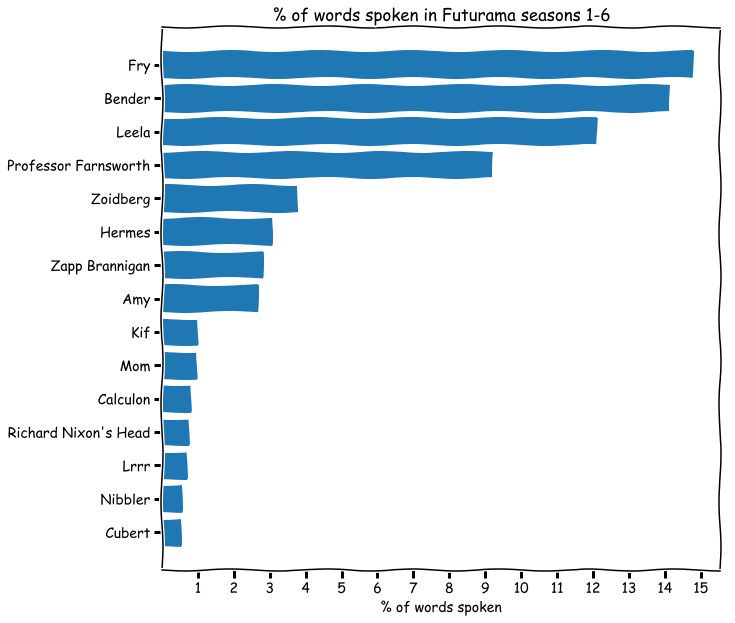

In [12]:
matplotlib.rcParams["figure.figsize"] = (10, 10)
#with pyplot.style.context(("seaborn-pastel")):
with pyplot.xkcd():
    percentages = [speakerTokenCounts[i]["COUNT"] / totalTokens * 100 for i in range(15)]
    names = [speakerTokenCounts[i]["SPEAKER"] for i in range(15)]
    pyplot.barh(list(reversed(range(len(names)))), percentages, tick_label=names)
    pyplot.xticks(list(range(1,16)))
    pyplot.title("% of words spoken in Futurama seasons 1-6")
    pyplot.xlabel("% of words spoken")
    pyplot.show()

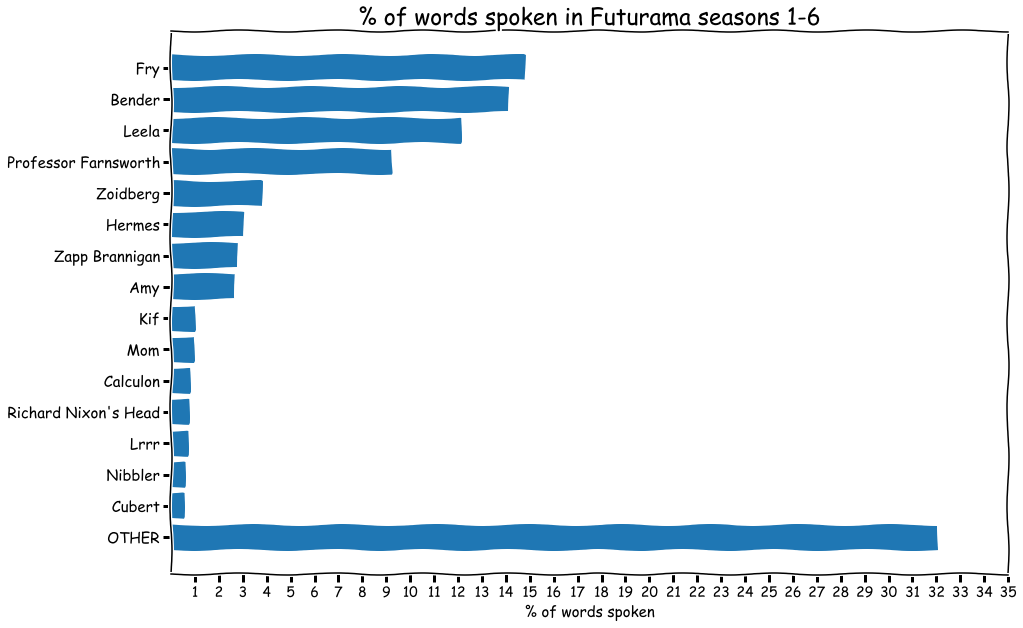

In [13]:
matplotlib.rcParams["figure.figsize"] = (15, 10)
other = 100 - sum(percentages)
with pyplot.xkcd():
    percentagesWithOther = list(percentages) + [other]
    namesWithOther = list(names) + ["OTHER"]
    pyplot.barh(list(reversed(range(len(namesWithOther)))), percentagesWithOther, tick_label=namesWithOther)
    pyplot.xticks(list(range(1,36)))
    pyplot.yticks(fontsize=15)
    pyplot.title("% of words spoken in Futurama seasons 1-6", fontsize=23)
    pyplot.xlabel("% of words spoken", fontsize=15)
    pyplot.show()

In [14]:
wordCounts = []
wordCountsLookup = {}
totalWordCount = 0

for episode in episodesTsv:
    with open(f"{tsvDirectory}/{episode[2]}", "r", encoding="utf-8") as episodeFile:
        lines = tsv_lines(episodeFile.read())
    
    for line in lines:
        words = tokenise(line[1])
        totalWordCount += len(words)
        for word in words:
            wordId = word.lower()
            if wordId in wordCountsLookup:
                wordCounts[wordCountsLookup[wordId]]["COUNT"] += 1
            else:
                wordCountsLookup[wordId] = len(wordCounts)
                wordCounts.append({
                    "WORD": word,
                    "COUNT": 1
                })

wordCounts.sort(key=lambda x: -x["COUNT"])

print(f"Words counted: {totalWordCount}")
print(f"Unique words (case insensitive): {len(wordCounts)} ({round(len(wordCounts) / totalWordCount * 100, 2)})%")

Words counted: 251486
Unique words (case insensitive): 18378 (7.31)%


In [15]:
output = "<b>Top twenty</b><br /><table><tr><th>Word</th><th>Count</th></tr>"
for i in range(20):
    output += html_table_row([wordCounts[i]["WORD"], wordCounts[i]["COUNT"]])
output +="</table>"

display(HTML(output))

Word,Count
the,8262
you,6921
I,6911
a,5878
to,5152
of,3571
and,3555
It,3066
my,2540
in,2465


In [16]:
upperWordCounts = []
upperWordCountsLookup = {}
totalUpperWordCount = 0

for episode in episodesTsv:
    with open(f"{tsvDirectory}/{episode[2]}", "r", encoding="utf-8") as episodeFile:
        lines = tsv_lines(episodeFile.read())
    
    for line in lines:
        words = tokenise(line[1])
        for word in words:
            if word[0].isupper():
                totalUpperWordCount += 1
                wordId = word.lower()
                if wordId in upperWordCountsLookup:
                    upperWordCounts[upperWordCountsLookup[wordId]]["COUNT"] += 1
                else:
                    upperWordCountsLookup[wordId] = len(upperWordCounts)
                    upperWordCounts.append({
                        "WORD": word,
                        "COUNT": 1
                    })

upperWordCounts.sort(key=lambda x: -x["COUNT"])

print(f"Words counted: {totalUpperWordCount}")
print(f"Unique words (starting with upper case): {len(upperWordCounts)} ({round(len(upperWordCounts) / totalUpperWordCount * 100, 2)})%")

Words counted: 60780
Unique words (starting with upper case): 5811 (9.56)%


In [17]:
output = "<b>Top twenty (starting with upper case letter)</b><br /><table><tr><th>Word</th><th>Count</th></tr>"
for i in range(20):
    output += html_table_row([upperWordCounts[i]["WORD"], upperWordCounts[i]["COUNT"]])
output +="</table>"

display(HTML(output))

Word,Count
I,6910
I'm,1919
You,1440
Oh,1336
The,1015
Bender,978
And,970
It's,938
No,872
What,870


In [18]:
characters = [speaker["SPEAKER"] for speaker in speakerTokenCounts]
characterWords = []
characterWordsLookup = {}
for character in characters:
    characterWords.append({
        "CHARACTER": character,
        "WORDS": [],
        "WORDS_LOOKUP": {}
    })

for episode in episodesTsv:
    with open(f"{tsvDirectory}/{episode[2]}", "r", encoding="utf-8") as episodeFile:
        lines = tsv_lines(episodeFile.read())
    
    for line in lines:
        speaker = line[0]
        words = tokenise(line[1])
        for word in words:
            for iCharacter in range(len(characterWords)):
                character = characterWords[iCharacter]["CHARACTER"]
                if word.lower() in characterWords[iCharacter]["WORDS_LOOKUP"]:
                    if speaker == character:
                        characterWords[iCharacter]["WORDS"][characterWords[iCharacter]["WORDS_LOOKUP"][word.lower()]]["SCORE"] += 1
                    else:
                        characterWords[iCharacter]["WORDS"][characterWords[iCharacter]["WORDS_LOOKUP"][word.lower()]]["SCORE"] -= 1
                else:
                    characterWords[iCharacter]["WORDS_LOOKUP"][word.lower()] = len(characterWords[iCharacter]["WORDS"])
                    characterWords[iCharacter]["WORDS"].append({
                        "WORD": word,
                        "SCORE": 1 if speaker == character else -1
                    })

bender = [bender for bender in characterWords if bender["CHARACTER"] == "Bender"]
print(bender)

[{'CHARACTER': 'Bender', 'WORDS': [{'WORD': 'Space', 'SCORE': -124}, {'WORD': 'It', 'SCORE': -2188}, {'WORD': 'seems', 'SCORE': -40}, {'WORD': 'to', 'SCORE': -3902}, {'WORD': 'go', 'SCORE': -433}, {'WORD': 'on', 'SCORE': -1066}, {'WORD': 'and', 'SCORE': -2619}, {'WORD': 'forever', 'SCORE': -34}, {'WORD': 'But', 'SCORE': -1157}, {'WORD': 'then', 'SCORE': -348}, {'WORD': 'you', 'SCORE': -5031}, {'WORD': 'get', 'SCORE': -497}, {'WORD': 'the', 'SCORE': -6270}, {'WORD': 'end', 'SCORE': -61}, {'WORD': 'gorilla', 'SCORE': -6}, {'WORD': 'starts', 'SCORE': -3}, {'WORD': 'throwing', 'SCORE': -4}, {'WORD': 'barrels', 'SCORE': -3}, {'WORD': 'at', 'SCORE': -611}, {'WORD': "that's", 'SCORE': -621}, {'WORD': 'how', 'SCORE': -420}, {'WORD': 'play', 'SCORE': -64}, {'WORD': 'game', 'SCORE': -32}, {'WORD': 'stink', 'SCORE': -18}, {'WORD': 'loser', 'SCORE': -15}, {'WORD': 'Hey', 'SCORE': -321}, {'WORD': 'Fry', 'SCORE': -524}, {'WORD': 'Pizza', 'SCORE': -53}, {'WORD': 'goin', 'SCORE': -15}, {'WORD': 'out',

In [19]:
# https://github.com/DanielJohnBenton/AfinnLookup#acknowledgements
with open("misc_data/AFINN-111-DJB-amended.txt", "r", encoding="utf-8") as afinnFile:
    afinnData = [line.split("\t") for line in afinnFile.read().splitlines()]
    
afinnLookup = {line[0]: int(line[1]) for line in afinnData}

def afinn(word):
    global afinnLookup
    word = word.lower()
    if word in afinnLookup:
        return afinnLookup[word]
    return 0

print(afinn("Awful"))
print(afinn("wonderful"))
print(afinn("fsdfjl"))

-3
4
0
